# NLP Cookbook

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.

***Source***: wikipedia

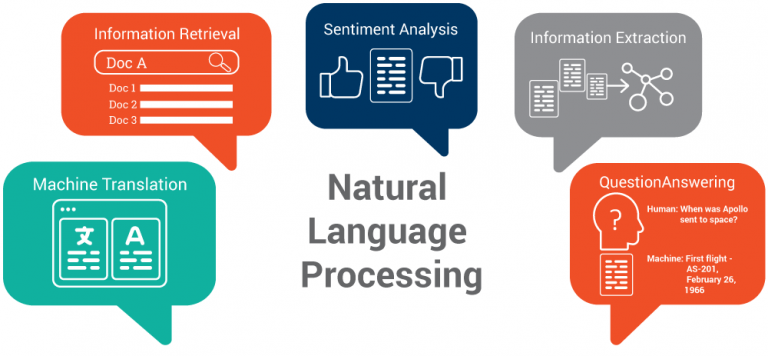

Here we will explore the below applications of NLP:                                  
1. Extracting text data from pdf using OCR
2. Information extraction using an multi language general purpose pipeline
3. Extraction address and names from email data using a finetunes ner model
4. Extraction of keywords from texts
5. Text summerization using BART

**Extract data from PDF**
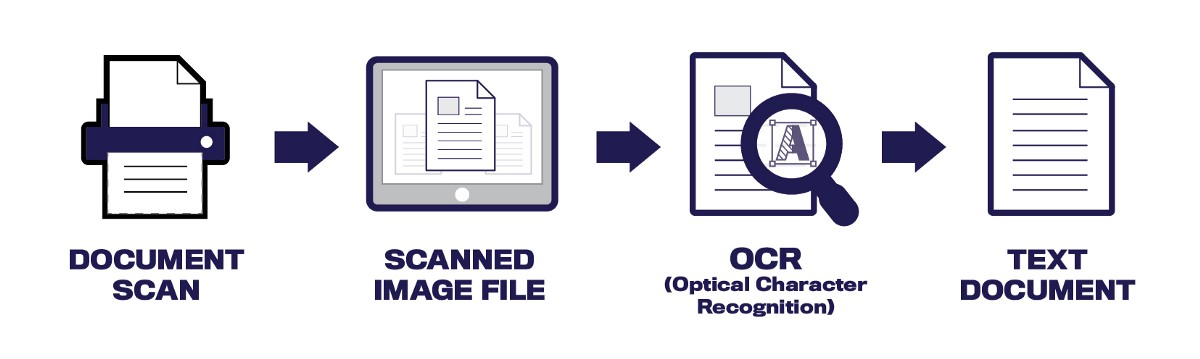

In [1]:
!pip install pdfminer.six

     |████████████████████████████████| 5.6 MB 3.9 MB/s 
     |████████████████████████████████| 3.2 MB 34.8 MB/s 


In [2]:
#https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python
from pdfminer.high_level import extract_text
text = extract_text(r'C:\Users\dk2350\OneDrive - KME\Skrivebord\NLP DEMO\sample_2.pdf')
text

"På bowlingbanen i Lalandia i Rødbyhavn får Martin Jensen fra Slagelse en tiltrængt \nferiepause med sine tre børn. \n- Det er rart at se dem slå sig løs. De får noget frihed og en masse sociale \ninteraktioner med nogen, de ikke kender, siger han. \nMartin Jensen er en af de 7.700 familier der har søgt feriehjælp fra Dansk \nFolkehjælp i år for at kunne komme på sommerferie. \n \n- Når man skal hjemmeskole tre børn, skal man også have bærbare pc'er til tre \nbørn. Når børnene ikke går i dagpleje, vuggestue eller børnehave, skal man \npludselig give både morgenmad, frokost og eftermiddagsmad. \n \nNINNA THOMSEN, DIREKTØR I MØDREHJÆLPEN \nHan er uddannet indenfor restaurantbranchen, men har været på kontanthjælp siden \nbegyndelsen af coronakrisen. \n- Og så har pengene bare ikke været til det. Når man har tre børn, kommer der \nhurtigt uforudsete udgifter. Jeg har for eksempel en søn på ti år, der slider sine sko \nop som jeg ved ikke hvad, siger Martin Jensen. \nHan er langt fra den e

In [6]:
# Convert the extracted texts to dataframe
import pandas as pd
base_path='C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP DEMO/'
files=['sample_1.pdf','sample_2.pdf','sample_3.pdf','sample_4.pdf','sample_5.pdf']

data=pd.DataFrame(columns=['file','text'])
files=[base_path+en for en in files]
texts=[extract_text(file) for file in files]
data['file']=files
data['text']=texts

C:\Users\dk2350\Anaconda3\envs\demo\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dk2350\Anaconda3\envs\demo\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\dk2350\Anaconda3\envs\demo\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
data.head()

,file,text
0,C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP ...,Når åbningsceremonien ved OL i Tokyo meget sna...
1,C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP ...,På bowlingbanen i Lalandia i Rødbyhavn får Mar...
2,C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP ...,PDF File Format\n\nQuarterly Data Points\n\nQU...
3,C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP ...,They tried to make me go to rehab. But I said ...
4,C:/Users/dk2350/OneDrive - KME/Skrivebord/NLP ...,"En 17-årig satte sit liv på spil for en pige, ..."


In [ ]:
# convert the data to csv
data.to_csv('extracted_pdf.csv')

**NER**

Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc

source: wikipedia

In [7]:
! pip3 install -U spacy

     |████████████████████████████████| 5.8 MB 4.1 MB/s 
     |████████████████████████████████| 621 kB 47.6 MB/s 
     |████████████████████████████████| 10.1 MB 9.9 MB/s 
     |████████████████████████████████| 456 kB 47.3 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [7]:
# download spacy models
!python -m spacy download da_core_news_lg
!python -m spacy download en_core_web_lg
!python -m spacy download da_core_news_sm
!python -m spacy download fr_core_news_md
!python -m spacy download nb_core_news_md

     |████████████████████████████████| 574.5 MB 3.8 kB/s 
  Attempting uninstall: da-core-news-lg
    Found existing installation: da-core-news-lg 3.1.0
    Uninstalling da-core-news-lg-3.1.0:
      Successfully uninstalled da-core-news-lg-3.1.0
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_lg')
     |████████████████████████████████| 778.8 MB 20 kB/s 
  Attempting uninstall: en-core-web-lg
    Found existing installation: en-core-web-lg 3.1.0
    Uninstalling en-core-web-lg-3.1.0:
      Successfully uninstalled en-core-web-lg-3.1.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 18.8 MB 153 kB/s 
  Attempting uninstall: da-core-news-sm
    Found existing installation: da-core-news-sm 3.1.0
    Uninstalling da-core-news-sm-3.1.0:
      Successfully uninstalled da-core-news-sm-3.1.0
✔ Download and installation successful
You can now load the pa

Lets try executing a simple code snippet using spacy OOB NER model

In [8]:
# sample spacy code and visualization
# https://spacy.io/usage/visualizers
import spacy
from spacy import displacy

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

nlp = spacy.load("en_core_web_lg")
doc = nlp(text)
displacy.render(doc, style="ent",jupyter=True)

In [12]:
! pip3 install -r /content/requirements.txt

     |████████████████████████████████| 9.9 MB 4.2 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 12.8 MB 73 kB/s 
     |████████████████████████████████| 981 kB 39.9 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 910 kB 42.8 MB/s 
     |████████████████████████████████| 9.1 MB 7.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5ec29a7bfa59240acb89ba5ce6c55143467b322d6f828153937a1b90b68a41a8
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.2
    Uninstalling pydantic-1.8.2:
      Successfully uninstalled pydantic-1.8.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.

In [5]:
# for polyglot support
!pip3 install pyicu
!pip3 install pycld2
!pip3 install morfessor
!pip3 install polyglot

     |████████████████████████████████| 298 kB 4.0 MB/s 
  Created wheel for pyicu: filename=PyICU-2.7.4-cp37-cp37m-linux_x86_64.whl size=1374724 sha256=3e3b8518577e205f7a9314b11a1e6a7f220050e618740b8b1e789c3316b52391
  Stored in directory: /root/.cache/pip/wheels/c4/3a/c8/2d2397cd8f6cd04489ecac3d1e6821bb4938d73312d69b834f
Successfully built pyicu
     |████████████████████████████████| 41.4 MB 38 kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834236 sha256=2b6285c94ef59aed6b5eda5b0ace648447472deeef6148b0f9b4ec6dbd39996d
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2
     |████████████████████████████████| 126 kB 4.5 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52578 sha256=e621fe30999aa8c43379cac62d68d0d731ab36c77f787c1d464d78acccc0c0f0
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad22

In [23]:
!pip install pandas --upgrade

     |████████████████████████████████| 11.3 MB 4.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


**Multilanguage General Purpose NER Pipeline using Spacy and Stdnum**

In [47]:
# Import necessary libraries
import os
import pandas as pd
import pickle
import spacy
from spacy.matcher import Matcher
from tqdm.notebook import tqdm as tqdm
import re
from configparser import ConfigParser
from spacy.language import Language
from langdetect import detect
from polyglot.text import Text
import sqlalchemy
import pymysql
import zipfile
from datetime import datetime
from spacy.lang.en import English
from stdnum.de import idnr
from stdnum.dk import cvr
from stdnum.fr import nir
import time

class NER_Integrated:
    def detect_lang(self,text):
        return detect(text) 
    
    # Method to convert polyglot outpt format to spacy output format
    def convert_to_spacy_format(self,ents):
        temp=[]
        for entity in ents: 
            temp.append((entity[0],entity.tag.split('-')[1]))
        return temp    

    # Method to detect entities
    def get_entities(self,models,text,langinfo,entityinfo,modelinfo,nonspacylangs,bdkcustomenabled,lang=None):
        """
        The method runs the NER pipeline and return the configured entities
        input: text-input to run NER
        lang-optional parameter, if the language of the text is known, langdetect will run if left as blank
        """
        if(lang is None):
            lang=self.detect_lang(text)
        res={}
        res['lang']=lang
        if lang in langinfo["InterestedLanguages"]:
            # If the language is Spacy supported
            if(lang not in nonspacylangs['Langs']):
                if((lang=='da') and (bdkcustomenabled['enabled']=="1") and(bdkcustomenabled['custom_only']=='1')):
                    nlp=models['da_bdk_custom']  
                else:       
                    # Get model details
                    nlp=models[lang]
                # Run Prediction
                doc = nlp(text) 
                temp=[]
                for ent in doc.ents:
                    if(entityinfo[lang]=='ALL')and (ent.label_ not in ['PER','Name','PERSON']): 
                        temp.append(((ent.text,ent.label_))) 
                    elif(ent.label_ in ['PER','Name','PERSON']):
                        lbl='PER'  
                        if(lbl in entityinfo[lang]) or (entityinfo[lang]=='ALL'):
                            temp.append(((ent.text,lbl)))    
                    elif(ent.label_ in entityinfo[lang]):
                        temp.append(((ent.text,ent.label_)))
                # Danish CPR Entities        
                if((lang=='da') and (('CPR' in entityinfo[lang])or (entityinfo[lang]=='ALL'))):
                    cp=CPR()
                    temp+=cp.extract_cpr(text,models['en']) 
                # UK NIN Entities        
                if ('NIN' in entityinfo[lang]) or(entityinfo[lang]=='ALL'):
                    nin=NIN()
                    temp+=nin.extract_nin(text,models['en'])   
                # Danish CVR Entities        
                if ('CVR' in entityinfo[lang]) or (entityinfo[lang]=='ALL'):
                    st=StdnumSupport()
                    temp+=st.extract_CVR(text,models['en'])   
                # German IdNr Entities        
                if ('IdNr' in entityinfo[lang])or (entityinfo[lang]=='ALL'):
                    st=StdnumSupport()
                    temp+=st.extract_IdNr(text,models['en'])   
                # French NIR Entities        
                if ('NIR' in entityinfo[lang]) or (entityinfo[lang]=='ALL'):
                    st=StdnumSupport()
                    temp+=st.extract_NIR(text,models['en'])          
                # BDK Custom Model fo 'da'     
                if((lang=='da') and (bdkcustomenabled['enabled']) and (bdkcustomenabled['custom_only']=='0')):
                    model_custom=models['da_bdk_custom']   
                    temp+=self.run_custom_NER(text,model_custom)            
                res['entities']=temp
            else:
                # If it's a interested non spacy language - for now finnish
                # 21/04/2021 - extending bulgerian support
                if (lang=='fi'):
                    # If it's a interested non spacy language - for now finnish
                    predicted = Text(text, hint_language_code='fi')
                    res['entities']=self.convert_to_spacy_format(predicted.entities)  
                elif (lang=='bg'):
                    predicted = Text(text, hint_language_code='bg')
                    res['entities']=self.convert_to_spacy_format(predicted.entities)  
                    print(res['entities'])                 
        return res      
    # method to execute custom NER
    def run_custom_NER(self,text,model_custom):
        doc=model_custom(text) 
        return [(ent.text, ent.label_) for ent in doc.ents if ent.label_!='CPR']  
    
    # Run the pipeline on entier dataset
    def run_ner_on_dataset(self,models,data,config_object,dataColumnName):
        langinfo = config_object["LANGCONFIG"]
        entityinfo = config_object["ENTITYCONFIG"]
        modelinfo = config_object["MODELSCONFIG"]
        nonspacylangs=config_object["NONSPACYSUPPORT"]
        bdkcustomenabled=config_object["BDKCUSTOM"]
        sqlentities=config_object["SQLENTITIES"]
        content=[]
        res=[]
        for text in list(data[dataColumnName]):
            try:
                res.append(self.get_entities(models,text,langinfo,entityinfo,modelinfo,nonspacylangs,bdkcustomenabled))
                content.append(text)
            except Exception as e:
                print(e)
        res_data=pd.DataFrame(columns=['content','ner_result']) 
        res_data['content']= content
        res_data['ner_result']=res
        temp=[]
        for en in res:
            try:
                x=[i for i in sqlentities['interested'].split(',')]
                x_flag=[i+'_PRESENT' for i in sqlentities['interested'].split(',')]
                y=[en['entities'][i][1] for i in range(len(en['entities']))]
                y_=[en['entities'][i][0] for i in range(len(en['entities']))]
                en_list_=['None' for i in range(len(x))]
                for i in range(len(y)):
                    if(y[i] in x):
                        index=x.index(y[i])
                        en_list_[index]=en_list_[index]+','+y_[i]
                        en_list_[index]=en_list_[index].replace('None,','')
                en_list=['1' if  i  in y else '0' for i in x]
                column_len=len(en_list_+en_list)
                temp.append(en_list_+en_list)
            except Exception as e:
                print(e)    
                #temp.append(['ERR' for i in range(len(column_len))])            
        entity_info=pd.DataFrame(temp,columns=x+x_flag)  
        entity_info['content']= res_data['content']
        final=pd.concat([res_data,entity_info],axis=1) 
        return entity_info      

    def export_to_sql(self,df,tableName,server):                                               
        sqlEngine = sqlalchemy.create_engine(server, pool_recycle=3600)
        dbConnection = sqlEngine.connect()
        try:
            df.to_sql(tableName, dbConnection, if_exists='replace')
            print("Table %s created successfully."%tableName)
        except ValueError as vx:
            print(vx)
        except Exception as ex:   
            print(ex)
        finally:
            dbConnection.close()
max_days={1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
class CPR:
    # function to check if the year is leap year
    def is_leap_year(self,year):
        if (year % 4) == 0:
            if (year % 100) == 0:
                if (year % 400) == 0:
                    return True
                else:
                    return False
            else:
                 return True
        else:
            return False

    # Utility to validate CPR
    def is_valid_cpr(self,input):
        res=True
        # if dd or mm is 0 return false
        if(int(input[0:2])==0 or int(input[2:4])==0):
            return False 
        # if mm > 12 return false     
        elif(int(input[2:4])>12):
            return False
        # If mm is not feb and dd> max no of days in that month return false    
        elif(int(input[2:4])!=2 and int(input[0:2])>max_days[int(input[2:4])]):
            return False
        # If mm is feb    
        elif(int(input[2:4])==2):
            # if yy<=20 we assume DOB is after 2000
            if(int(input[4:6])<=20):
                # if yy is leap year, dd>29 return false
                if(self.is_leap_year(int('20'+input[4:6]))):
                    if(int(input[0:2])>29):
                        return False    
                # if yy is not leap year, dd>28 return false        
                else:
                    if(int(input[0:2])>28):
                        return False 
            # if yy>20 DOB is in 19's                
            else:
                # if yy is leap year, dd>29 return false
                if(self.is_leap_year(int('19'+input[4:6]))):
                    if(int(input[0:2])>29):
                        return False
                # if yy is not leap year, dd>28 return false        
                else:
                    if(int(input[0:2])>28):
                        return False                                                      
        return res                

    # function for CPR pattern matching
    def extract_cpr(self,text,model):
        text=text.replace('.'," ")
        text=text.replace(','," ")
        nlp=model
        cpr=[]
        matcher = Matcher(nlp.vocab) 
        # Pattern for CPR Matcher
        pattern_1 = [{"TEXT": {"REGEX": "^\d{6}"}},
           {"TEXT": {"REGEX": "-"}},
           {"TEXT": {"REGEX": "\d{4}$"}}]
        pattern_2 = [{"TEXT": {"REGEX": "^[0-9]{10}$"}}]       
        matcher.add("CPR_1", [pattern_1])
        matcher.add("CPR_2", [pattern_2])
        doc=nlp(text)  
        matches = matcher(doc)
        temp=[]
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]
            if(len(span.text)>=10 and len(span.text)<12 and self.is_valid_cpr(span.text[0:6])):
                temp.append((span.text,'CPR'))
        if(len(temp)>0):
            return temp
        else:
            return []

class NIN:
    def is_valid_prefix_suffix(self,text):
        if(text[-1] not in['A','B','C','D']):
            return False   
        if(text[0] in ['D','F','I','Q','U','V']):
            return False   
        if(text[1] in ['D','F','I','Q','U','V','O']):
            return False   
        if(text[0:2] in ['BG', 'GB','KN','NK','NT','TN','ZZ']):
            return False 
        return True                

    # Method to  extract uk NIN
    def extract_nin(self,text,model):
        text=re.sub('[^a-zA-Z.\d\s]', '', text)
        text=text.replace('.'," ")
        text=text.replace(','," ")
        nlp=model
        matcher = Matcher(nlp.vocab) 
        # Pattern for UK NIN Matcher
        pattern_1 = [{"TEXT": {"REGEX": "^\s*[a-zA-Z]{2}(?:\s*\d\s*){6}[a-zA-Z]?\s*$"}}]
        matcher.add("NIN", [pattern_1])
        doc=nlp(text)  
        matches = matcher(doc)
        temp=[]
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]
            if(self.is_valid_prefix_suffix(span.text)):
                temp.append((span.text,'NIN'))
        if(len(temp)>0):
            return temp
        else:
            return []			
# Stdnum library Integration
class StdnumSupport:
    # GERMAN IDNR
    def extract_IdNr(self,text,model):
        nlp = model
        matcher = Matcher(nlp.vocab) 
        # Pattern for German IDNR Matcher
        pattern_1 = [{"SHAPE": "dd"},{"SHAPE": "ddd"},{"SHAPE": "ddd"},{"SHAPE": "ddd"}]
        pattern_2= [{"TEXT": {"REGEX": "^\d{11}"}}]
        matcher.add("IdNr1", [pattern_1])  
        matcher.add("IdNr2", [pattern_2])  
        doc=nlp(text)  
        matches = matcher(doc)
        temp=[]
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]
            # Validate the extracted patterns using stdnum
            if(idnr.is_valid(span.text)):
                temp.append((span.text,'IdNr'))
        if(len(temp)>0):
            return temp
        else:
            return []
    # DANISH CVR - https://www.wikidata.org/wiki/Property:P1059
    def extract_CVR(self,text,model):
        nlp = model
        matcher = Matcher(nlp.vocab) 
        # Pattern for German IDNR Matcher
        pattern_1= [{"TEXT": {"REGEX": "^\d{8}"}}]
        matcher.add("CVR", [pattern_1])   
        doc=nlp(text)  
        matches = matcher(doc)
        temp=[]
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]
            # Validate the extracted patterns using stdnum
            if(cvr.is_valid(span.text)):
                temp.append((span.text,'CVR'))
        if(len(temp)>0):
            return temp
        else:
            return []   
    # FRENCH NIR - https://en.wikipedia.org/wiki/INSEE_code#:~:text=Each%20French%20person%20receives%20at,%2B%20a%20two%2Ddigit%20key.        
    def extract_NIR(self,text,model):
        nlp = model
        matcher = Matcher(nlp.vocab) 
        # Pattern for German IDNR Matcher
        pattern_1= [{"TEXT": {"REGEX": "^\d{15}"}}]
        pattern_2= [{"SHAPE": "ddddddddddddd"},{"SHAPE": "dd"}]
        pattern_3= [{"SHAPE": "d"},{"SHAPE": "dd"},{"SHAPE": "dd"},{"SHAPE": "dd"},{"SHAPE": "ddd"},{"SHAPE": "ddd"},{"SHAPE": "dd"}]
        matcher.add("NIR1", [pattern_1])   
        matcher.add("NIR2", [pattern_2])  
        matcher.add("NIR3", [pattern_3])  
        doc=nlp(text)  
        matches = matcher(doc)
        temp=[]
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]
            # Validate the extracted patterns using stdnum
            if(nir.is_valid(span.text)):
                temp.append((span.text,'NIR'))
        if(len(temp)>0):
            return temp
        else:
            return []              			
class Driver:
    # method to filter duplicate entities from result
    def dedup_rows(self,res,columns=['PER','GPE','LOC']):
        # convert entities to lowercase
        res = res.applymap(lambda s: s.lower() if type(s) == str else s)
        # dedup using set
        for i in range(len(res)):
            for col in columns:
                res.iloc[i][col]=', '.join(set(res.iloc[i][col].split(',')))   
        return res 

    # Config the driver before running the script
    def run(self,data='ner_dataset.csv',dataColumnName='text'):
        # Enable/ disable logging
        log_enabled=True
        start_time = time.time()
	    # Read config.ini file
        config_object = ConfigParser()
        config_object.read("nerConfig.ini")
        langinfo = config_object["LANGCONFIG"]
        modelinfo = config_object["MODELSCONFIG"]
        nonspacylangs=config_object["NONSPACYSUPPORT"]
        sqlentities=config_object["SQLENTITIES"]
        models={}
        try:
            for lang in langinfo["InterestedLanguages"].split(','):
                if(lang not in nonspacylangs['Langs']):
                    models[lang]=spacy.load(modelinfo[lang]) 
        except Exception as e:
            print('[Error] model not found')        
            print('[Log] ',e)  
            return 
        try:          
            # UnZip the custom NER model - To use the BDK Custom model, must be inline with configuration
            with zipfile.ZipFile('/content/Custom_NER_Model_3.0.zip', 'r') as zip_ref:
                zip_ref.extractall('')
            models['da_bdk_custom']=spacy.load(modelinfo['da_bdk_custom']) 
        except:
            print('[Error] Unable to import custom BDK model')    
        ni=NER_Integrated()
        print('[Info]--Execution Started--')
        # Pass the column name which contains the test data
        df=ni.run_ner_on_dataset(models,data,config_object,dataColumnName)
        # dedup the results
        interested_entities=[i for i in sqlentities['interested'].split(',')]
        df=self.dedup_rows(df,columns=interested_entities)
        print('[Info]--Execution Completed--')
        csv_name="NER_RUN_"+datetime.now().strftime("%d_%b_%Y(%H:%M)"+".csv")
        df.to_csv(csv_name)
        exe_time=time.time() - start_time
        print('[Info]--Result Exported Successfully--')
        if(log_enabled==True):
            log_name="log_"+datetime.now().strftime("%d_%b_%Y(%H:%M)")+".txt"
            # Creates a log file
            f = open(log_name, "w")
            f.write("NER Pipeline Log")
            f.write("\n--------------------")
            f.write('\nTime stamp:'+datetime.now().strftime("%d_%b_%Y(%H:%M)"))
            f.write('\nInterested Entities:'+sqlentities['interested'])
            f.write('\nExecution Time:'+str(exe_time)+' s')
            f.write('\nGenerated CSV:'+csv_name)
            f.close()
        return df		
			

In [48]:
res=Driver().run(data=data,dataColumnName='text')

[Info]--Execution Started--
[Info]--Execution Completed--
[Info]--Result Exported Successfully--


In [49]:
# result without deduplication - for reference
res

,PER,GPE,LOC,PER_PRESENT,GPE_PRESENT,LOC_PRESENT,content
0,"STANIS ELSBORG,Stanis Elsborg,Stanis Elsborg,S...",None,"Tokyo,Japan,Japans,Tokyo,Japan",1,0,1,Når åbningsceremonien ved OL i Tokyo meget sna...
1,"Martin Jensen,Martin Jensen,THOMSEN,Martin Jen...",None,"Lalandia,Rødbyhavn,Slagelse,Danmark,Danmark,La...",1,0,1,På bowlingbanen i Lalandia i Rødbyhavn får Mar...
2,None,None,None,0,0,0,PDF File Format\n\nQuarterly Data Points\n\nQU...
3,"Amy Winehouses,Amy Winehouse,Amy Winehouse,Mad...",None,London,1,0,1,They tried to make me go to rehab. But I said ...
4,"Politimanden,Politibetjent Geir,Geir,Janne,Jan...",None,"Oslo,Oslo,Utøya,Tyrifjorden,Utøya,Utøya,Utøya,...",1,0,1,"En 17-årig satte sit liv på spil for en pige, ..."


In [43]:
# result with deduplication 
res

,PER,GPE,LOC,PER_PRESENT,GPE_PRESENT,LOC_PRESENT,content
0,stanis elsborg,none,"japans, tokyo, japan",1,0,1,når åbningsceremonien ved ol i tokyo meget sna...
1,"leo rasmussen, klaus nørlem, thomsen, oliver, ...",none,"lalandia, slagelse, ringsted, rødbyhavn, danmark",1,0,1,på bowlingbanen i lalandia i rødbyhavn får mar...
2,none,none,none,0,0,0,pdf file format\n\nquarterly data points\n\nqu...
3,"norah jones, mark ronson, betty bass, valerie,...",none,london,1,0,1,they tried to make me go to rehab. but i said ...
4,"janne, politibetjent geir, geir, politimanden",none,"utøya, oslo, tyrifjorden",1,0,1,"en 17-årig satte sit liv på spil for en pige, ..."


**Custom NER with Spacy**


Required files: training_data.csv(email data), cusotm_model_1.zip (custom ner model).
A fine tuned ner model to extract name and address from email data

In [50]:
# import necessary libraries
import zipfile
#from prettytable import PrettyTable
import spacy
from spacy.scorer import Scorer
from spacy.training import Example
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sqlalchemy import create_engine
#import pymysql
from tqdm import tqdm_notebook as tqdm
import spacy
from spacy.matcher import Matcher
from stdnum.dk import cvr

# class to run cystom NER extraction
class custom_ner:

    # method to predict the interested/ configured entities
    def predict(self,nlp,data,interested_entities=['Address','Names']):
        entities=[]
        for text in data:
            doc=nlp(text)
            temp={}
            for en in interested_entities:
                temp[en]=[' ']
            for ent in doc.ents:
                    temp[ent.label_].append(ent.text)  
            entities.append(temp)  
        return entities

    # method to run ner extraction from a dataset
    def run_custom_email_ner_da(self,test_data='/content/dummy.xls',content_column='text',model_path='/content/custom_email_ner_da_2705.zip',interested_entities=['Address','Names']):
        #test_data=pd.read_csv(test_data)
        test_data=list(test_data[content_column])
        test_data=[str(en) for en in test_data]
        # UnZip the custom NER model
        with zipfile.ZipFile(model_path, 'r') as zip_ref:
            zip_ref.extractall('')
        # Load the model
        mod=spacy.load('/content/Model')  
        entities=self.predict(mod,test_data,interested_entities)
        res=pd.DataFrame(entities)  
        for col in res.columns:
            temp=[]
            for en in res[col]:
                if(en[0]==' '):
                    en.pop(0)
                temp.append(",".join(en))  
            res[col]=temp 
        res['Text']= test_data   
        return res
        


In [51]:
data=pd.read_csv('/content/training_data.csv')
interested_entities=['Address','Names']
content_column='text'
res_ner=custom_ner().run_custom_email_ner_da(test_data=data,model_path='/content/custom_model_1.zip',content_column=content_column,interested_entities=interested_entities)

**Sample NER Application with custom NER model using Gradio**

Let's develop a sample application using this custom ner model

In [54]:
! pip3 install gradio

     |████████████████████████████████| 3.4 MB 4.2 MB/s 
     |████████████████████████████████| 206 kB 30.5 MB/s 
     |████████████████████████████████| 1.9 MB 40.0 MB/s 
     |████████████████████████████████| 961 kB 43.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=1f4a63f1189e39ce1bf9285e1a2ba30ad60d3a301f4a67ad2b4606988ed1e4b1
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=bbe5206058f06aee14dfde42d7b3bdaf430c9de3d8d0cd849b52346e4b286842
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [65]:
    # method to predict the interested/ configured entities
    def predict(nlp,text,interested_entities=['Address','Names']):
        entities=[]
        doc=nlp(text)
        temp={}
        for en in interested_entities:
            temp[en]=[' ']
        for ent in doc.ents:
                temp[ent.label_].append(ent.text)  
        entities.append(temp)  
        return entities

In [69]:
mod=spacy.load('/content/Model')  
text=data.iloc[16]['Attachment_text']
predict(mod,text,interested_entities=['Address','Names'])

[{'Address': [' ',
   'Fyrrevej 97 4632 Bjæverskov',
   'Rådhuset Rådhusholmen 10 DK - 2670 Greve'],
  'Names': [' ',
   'Lisa Thomhav Stubberup',
   'Birgitte Kerschner-Hansen',
   'Lisa Thomhav Stubberup']}]

In [75]:
text

'Uansøgt afsked I forlængelse af høringsbrev af 15. april 2021 skal Greve Kommune oplyse, at du opsiges fra din stilling som social- og sundhedshjælper ved Rehabilitering Nat jfr. Overenskomst for social- og sundhedspersonale. Opsigelse sker med dit overenskomstmæssige varsel, som er 3 måneder til fratrædelse pr. 31. juli 2021. Du vil være tjenestefritaget frem til den 10. maj 2021. Du vil få et brev om indkaldelse til en samtale, som holdes den 10. maj 2021 kl. 14.00 på Greve Rådhus. Formålet med samtalen er at aftale nærmere om din tjeneste i opsigelsesperioden. Begrundelsen for afskedigelsen er, at du konkret ikke har fulgt de arbejdsgange og retningslinjer, som der er fastsat for dit arbejde, og at du ikke i forbindelse med drøftelsen heraf udviste forståelse for vigtigheden af at følge disse. Sagen er nærmere beskrevet i partshøringsbrevet, idet Greve Kommune skal bemærke, at der ikke er kommet nye oplysninger frem efter afsendelsen af partshøringsbrevet. Greve Kommune har lagt ti

In [86]:
import gradio as gr
import re

# sample method to predict entities using custom ner
def predict(text):
    nlp=spacy.load('/content/Model')  
    interested_entities=['Address','Names']
    entities=[]
    doc=nlp(text)
    temp={}
    for en in interested_entities:
        temp[en]=[]
    for ent in doc.ents:
            temp[ent.label_].append(ent.text)  
    entities.append(temp)  
    return entities[0]
# initialize interface for gradio app
iface = gr.Interface(
  fn=predict, inputs=gr.inputs.Textbox(default=data.iloc[16]['Attachment_text'],label='Input Text',lines=10),
  outputs=gr.outputs.KeyValues(label='Extracted NER'), interpretation=None,title='Custom NER',description='sample application to showcase custom ner using gradio')
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://29033.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7874/',
 'https://29033.gradio.app')

**Keyword Extraction**

Extract key information from text data using BERT
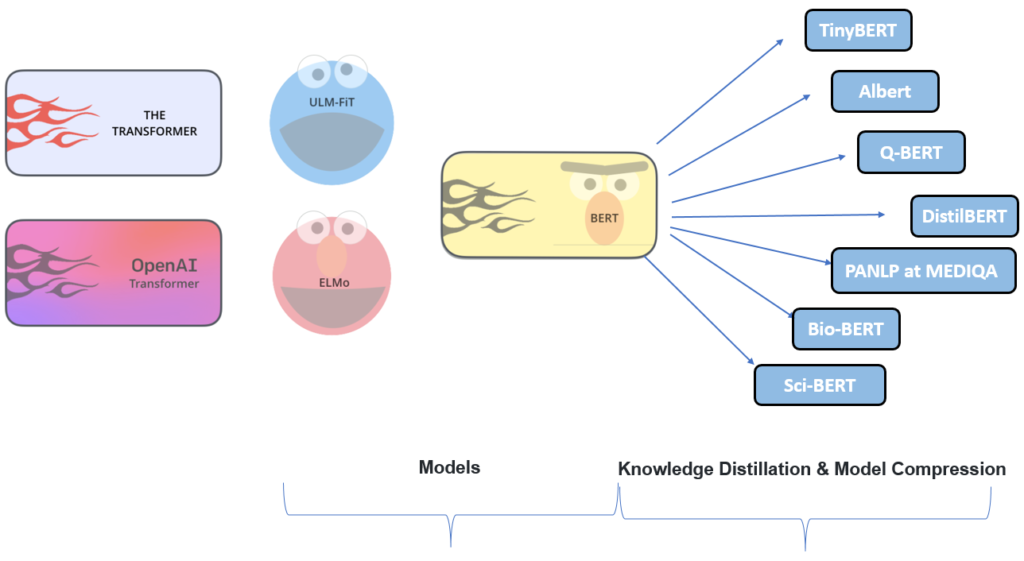

In [ ]:
!pip3 install sentence_transformers
!pip3 install transformers

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import pickle
import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
import numpy as np
import itertools
import sqlalchemy
import pymysql
from datetime import datetime
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Danish Stopwords and stemmer
stopwords_danish=stopwords.words('danish')
stopwords_english=stopwords.words('english')
stemmer=SnowballStemmer('danish')
stopwords_=stopwords_danish+stopwords_english

In [ ]:
# Class to extract keywords from text data
class KeywordExtract:
    def preprocess(self,text):
        preprocessed_texts = []
        # Cleaing the data, removing danish and english stopwords
        for sent in (text):
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z ]+', ' ', sent)
            # Check the performance removing the stemmer
            sent=' '.join(stemmer.stem(word) for word in sent.split() if word not in [stopwords_danish,stopwords_english] )
            preprocessed_texts.append(sent.lower().strip())
        return  preprocessed_texts 

    # https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea
    def max_sum_sim(self,doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates):
        # Calculate distances and extract keywords
        distances = cosine_similarity(doc_embedding, candidate_embeddings)
        distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)
        # Get top_n words as candidates based on cosine similarity
        words_idx = list(distances.argsort()[0][-nr_candidates:])
        words_vals = [candidates[index] for index in words_idx]
        distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]
        # Calculate the combination of words that are the least similar to each other
        min_sim = np.inf
        candidate = None
        for combination in itertools.combinations(range(len(words_idx)), top_n):
            sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
            if sim < min_sim:
                candidate = combination
                min_sim = sim
        return [words_vals[idx] for idx in candidate]              

    # Diversify the keywords using max sum similarity, higher the value of nr_candidates higher the diversity
    def extract_keywords_bert_diverse(self,doc,top_n=10,nr_candidates=20):
        n_gram_range = (1, 1)
        # Extract candidate words/phrases using count vectorizer (TF-IDF Scores)
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stopwords_).fit([doc])
        candidates = count.get_feature_names()
        # Embeddings of the document using Bert    
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        doc_embedding = model.encode([doc])
        candidate_embeddings = model.encode(candidates)
        keywords=self.max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates)
        return keywords  
    # method to run the extraction on a dataset
    def run_on_dataset(self,data,dataColumnName,top_n=10,nr_candidates=20):
        original_data=data[dataColumnName].values
        preprocessed_data=self.preprocess(original_data)
        columns=['content','keywords'] 
        res=[] 
        content=[]
        for i  in range(len(original_data)):
            try: 
                
                temp=''
                content.append(original_data[i])
                keywords=self.extract_keywords_bert_diverse(preprocessed_data[i],top_n,nr_candidates) 
                temp=temp+', '.join(keywords)
                res.append(temp)
            except Exception as e:
                print(e)    
        res_df= pd.DataFrame(columns=columns)
        res_df['content']=content
        res_df['keywords']= res            
        return res_df

In [ ]:
keys=KeywordExtract().run_on_dataset(data,dataColumnName='text')
keys.head()

,content,keywords
0,"En 17-årig satte sit liv på spil for en pige, ...","mennesk, terrorangreb, sat, ungdomsorganisatio..."


**Text Summerization**                                                            
 Text summerization using BART
 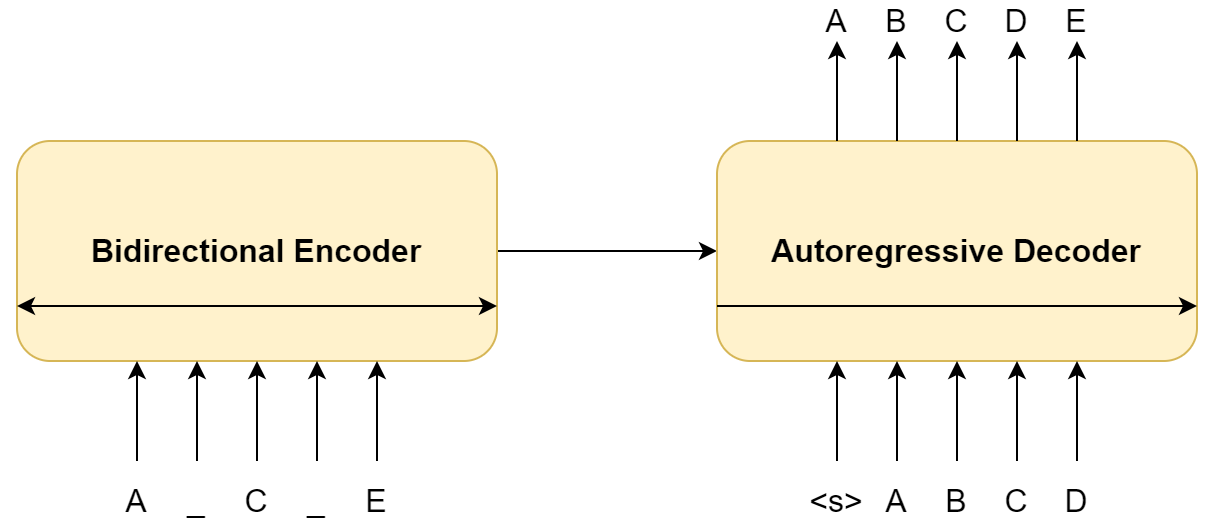

In [ ]:
! pip3 install ktrain

     |████████████████████████████████| 25.3 MB 94 kB/s 
     |████████████████████████████████| 6.8 MB 36.0 MB/s 
     |████████████████████████████████| 263 kB 50.0 MB/s 
     |████████████████████████████████| 1.9 MB 36.9 MB/s 
     |████████████████████████████████| 468 kB 50.7 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.1-py3-none-any.whl size=25282876 sha256=08643e8534b0f45ac068d18f2bd308c7ce52d92eaec7abcc22c050d3207f0bbe
  Stored in directory: /root/.cache/pip/wheels/dd/88/9f/06a5d95fa827fda1af47f5c9eca78c6233928f0455171d3711
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=cb05dcb885dcec93f2f9c8f6a9005e4ab8290434bc675c057365edb9581c40ab
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl size=34205 sha256=cafd4384600573c261f7dfb05c474c0cbbf1555c1e4e054a2a0b8b76c32088ff
  Stored in directory: /root/.ca

In [ ]:
from ktrain import text
ts = text.TransformerSummarizer()

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [ ]:
def summerize_text(texts):
    summaries=[]
    for i in tqdm(range(len(texts))):
      try:
          summaries.append(ts.summarize(texts[i]))
      except:
          pass
    return summaries      

In [ ]:
summary=summerize_text(data.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
summary

['En 17-årig satte sit liv på spil for en pige, hun ikke kendte. En tredje blev begravet efter eksplosionen i Oslo. 77 mennesker blev dræbt, og 90 personer blev såret under de to terrorangreb.']

**References:**

1. https://spacy.io/
2. https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/
3. https://jalammar.github.io/explaining-transformers/
4. https://towardsdatascience.com/build-a-keyword-extraction-api-with-spacy-flask-and-fuzzywuzzy-4909d7ffc105
5. https://huggingface.co/